In [1]:

import pandas as pd
import os

In [25]:
def load_files(data_directory):
    dirs = [d for d in os.listdir(data_directory)
        if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    files  = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        files_names = [os.path.join(label_dir,f)
                        for f in os.listdir(label_dir)
                        if f.endswith(".xlsx") or f.endswith(".csv")]
        for k in files_names:
            if "xlsx"==k.split(".")[1]:
                files.append(["csv",k,pd.read_excel(k)])
    return files

def concatFiles(files):
    return pd.concat([files[i][2] for i in range(len(files))],axis=0)

In [26]:
main_path = "C:\\Users\\temporal\\datos_energia\\datos\\cne"
total_files = load_files(main_path)

In [84]:
[f"id-{i}_PATH_: {total_files[i][1]}" for i in range(len(total_files))]

['id-0_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\infraestructura_capacidad_instalada\\Capacidad_Instalada_Generacion.xlsx',
 'id-1_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\infraestructura_capacidad_instalada\\SIC-Tx.xlsx',
 'id-2_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\infraestructura_capacidad_instalada\\SING-Tx.xlsx',
 'id-3_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\Produccion_y_consumo\\Consumos-de-Combustibles-SEN.xlsx',
 'id-4_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\Produccion_y_consumo\\Generacion_Bruta.xlsx',
 'id-5_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\Produccion_y_consumo\\generacion_bruta_Aysxn.xlsx',
 'id-6_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\Produccion_y_consumo\\generacion_bruta_Cch-Hor.xlsx',
 'id-7_PATH_: C:\\Users\\temporal\\datos_energia\\datos\\cne\\Produccion_y_consumo\\generacion_bruta_Magallanes.xlsx']

In [71]:
xls = pd.ExcelFile(total_files[0][1])
sheets = xls.sheet_names
dataframes = {}
for sheet in sheets[2:]:
    dataframes[sheet] = xls.parse(sheet,header=1)
    dataframes[sheet].columns = dataframes['SEN'].columns
xls.close()


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


In [72]:
labels = dataframes.keys()
for label in labels:
    print(f"Dimension de la hoja: {label}  --------> Shape: {dataframes[label].shape}")

Dimension de la hoja: SEN  --------> Shape: (756, 39)
Dimension de la hoja: LOSLAGOS  --------> Shape: (20, 39)
Dimension de la hoja: AYSEN  --------> Shape: (65, 39)
Dimension de la hoja: ISLADEPASCUA  --------> Shape: (12, 39)
Dimension de la hoja: MAGALLANES  --------> Shape: (47, 39)


In [82]:
labels = dataframes.keys()
for label in labels:
    print(f"Columns: {dataframes[label].columns}")

Columns: Index(['Sistema', 'Subsistema', 'Propietario', 'Razón Social Propietario',
       'RUT', 'Central', 'Estado', 'Fecha Puesta en Servicio Central',
       'Año Puesta en Servicio', 'Región', 'Comuna', 'Código Unidad',
       'Tipo Unidad', 'Fecha Puesta en Servicio Unidad', 'Unidades',
       'Marca / Modelo', 'Clasificación', 'Tipo de Energía', 'Ley ERNC',
       'Medio de Generación', 'Distribuidora', 'Punto de Conexión',
       'Combustible 1', 'Consumo Específico 1', 'Unidad Consumo Específico 1',
       'Combustible 2', 'Consumo Específico 2', 'Unidad Consumo Específico 2',
       'Combustible 3', 'Consumo Específico 3', 'Unidad Consumo Específico 3',
       'Tipo de Turbina Hidráulica', 'Gasto [m3/s]', 'Caída [m]', 'Este [UTM]',
       'Norte [UTM]', 'Huso [UTM]', 'Potencia Bruta [MW]',
       'Potencia Neta [MW]'],
      dtype='object')
Columns: Index(['Sistema', 'Subsistema', 'Propietario', 'Razón Social Propietario',
       'RUT', 'Central', 'Estado', 'Fecha Puesta en S

In [77]:
def concatFiles(files):
    cols = files.keys()
    return pd.concat([files[sheet] for sheet in cols],axis=0)

In [79]:
df_cne= concatFiles(dataframes)
df_cne

,Sistema,Subsistema,Propietario,Razón Social Propietario,RUT,Central,Estado,Fecha Puesta en Servicio Central,Año Puesta en Servicio,Región,...,Consumo Específico 3,Unidad Consumo Específico 3,Tipo de Turbina Hidráulica,Gasto [m3/s],Caída [m],Este [UTM],Norte [UTM],Huso [UTM],Potencia Bruta [MW],Potencia Neta [MW]
0,SEN,SIC,AASA ENERGÍA S.A.,NaN,76.596.827-5,PMGD TER EL CAMPESINO,En Operacion,24/01/2018,2018,Región Metropolitana de Santiago,...,NaN,NaN,NaN,,,300471.79,6282670.75,19H,1.00,0.995
1,SEN,SIC,ABASTIBLE S.A.,NaN,91.806.000-6,PMGD HP MAISAN,En Operacion,10/12/2013,2013,Región de La Araucanía,...,NaN,NaN,NaN,,,"667355,9926","5668669,037",18H,0.60,0.590
2,SEN,SIC,ACCIONA ENERGÍA CHILE HOLDINGS S.A.,NaN,NaN,PFV MALGARIDA,En Operacion,19/06/2021,2021,Región de Atacama,...,NaN,NaN,NaN,,,"404140,03","7094120,03",19J,204.32,200.680
3,SEN,SIC,ACCIONA ENERGÍA CHILE HOLDINGS S.A.,NaN,76.437.712-5,PE TOLPAN SUR,En Operacion,24/11/2020,2020,Región de La Araucanía,...,NaN,NaN,NaN,,,712859,5826350,18H,83.53,80.900
4,SEN,SIC,ACCIONA ENERGÍA CHILE HOLDINGS S.A.,NaN,76.437.712-5,PFV EL ROMERO,En Operacion,03/03/2017,2017,Región de Atacama,...,NaN,NaN,NaN,,,314253.24,6778336.99,19J,196.00,196.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,NaN,Eólica,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,Gas Natural,97.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,Petróleo Diesel,16.0902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
xls = pd.ExcelFile(total_files[3][1])
sheets = xls.sheet_names
#print(sheets)
dataframes = {}
for sheet in sheets:
    dataframes[sheet] = xls.parse(sheet)
    #dataframes[sheet].columns = dataframes['SEN'].columns
xls.close()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


In [98]:

labels = dataframes.keys()
for label in labels:
    print(f"Dimension de la hoja: {label}  --------> Shape: {dataframes[label].shape}")

Dimension de la hoja: TAPA  --------> Shape: (21, 3)
Dimension de la hoja: Base  --------> Shape: (40453, 12)
Dimension de la hoja: 2008  --------> Shape: (140, 20)
Dimension de la hoja: 2009  --------> Shape: (178, 20)
Dimension de la hoja: 2010  --------> Shape: (200, 20)
Dimension de la hoja: 2011  --------> Shape: (232, 20)
Dimension de la hoja: 2012  --------> Shape: (248, 20)
Dimension de la hoja: 2013  --------> Shape: (273, 20)
Dimension de la hoja: 2014  --------> Shape: (280, 20)
Dimension de la hoja: 2015  --------> Shape: (298, 20)
Dimension de la hoja: 2016  --------> Shape: (320, 20)
Dimension de la hoja: 2017  --------> Shape: (350, 20)
Dimension de la hoja: 2018  --------> Shape: (272, 20)
Dimension de la hoja: 2019  --------> Shape: (271, 20)
Dimension de la hoja: 2020  --------> Shape: (325, 20)
Dimension de la hoja: 2021  --------> Shape: (269, 20)
Dimension de la hoja: 2022  --------> Shape: (257, 10)
Dimension de la hoja: Resumen  --------> Shape: (486, 22)
Dimensi

In [99]:
# Base y Resumen los consideramos en un dataframe distinto que los dataframes anuales.
#consumo por categoria de combustible.
#promedio 

In [117]:
xls = pd.ExcelFile(total_files[3][1])
consumo_sne = {}
consumo_sne['Base'] = xls.parse('Base',header=4)
xls.close()

In [118]:
consumo_sne['Base'].columns

Index(['Unnamed: 0', 'AÑO', 'MES', 'MES NOMBRE', 'PROPIETARIO', 'CENTRAL',
       'UNIDAD', 'TIPO DE COMBUSTIBLE', 'GENERACIÓN [MWh]',
       'CONSUMO COMBUSTIBLE', 'UNIDAD COMBUSTIBLE', 'SUBSISTEMA'],
      dtype='object')

In [119]:
consumo_sne['Base'].iloc[:,1:]

,AÑO,MES,MES NOMBRE,PROPIETARIO,CENTRAL,UNIDAD,TIPO DE COMBUSTIBLE,GENERACIÓN [MWh],CONSUMO COMBUSTIBLE,UNIDAD COMBUSTIBLE,SUBSISTEMA
0,2008,1,Enero,Aes Gener,Salta,CC SALTA,Gas Natural,0.000000,NaN,NaN,SING
1,2008,1,Enero,Aes Gener,Salta,CC SALTA,Gas Natural,0.000000,NaN,NaN,SING
2,2008,1,Enero,Aes Gener,Salta,CC SALTA,Gas Natural,0.000000,NaN,NaN,SING
3,2008,1,Enero,Aes Gener,Salta,CC SALTA,Gas Natural,56082.330000,1.030320e+07,m3,SING
4,2008,1,Enero,Aes Gener,Salta,CC SALTA,Gas Natural,0.000000,NaN,NaN,SING
...,...,...,...,...,...,...,...,...,...,...,...
40444,2022,2,Febrero,Tecnored,Tapihue,NaN,GNL,2.824285,8.275156e+02,m3,SIC
40445,2022,2,Febrero,Termoeléctrica Colmito,Colmito,NaN,Petróleo Diesel,0.000000,0.000000e+00,Ton,SIC
40446,2022,2,Febrero,Termoeléctrica Colmito,Colmito,NaN,Gas Natural,0.000000,0.000000e+00,m3,SIC
40447,2022,2,Febrero,Termoeléctrica Colmito,Colmito,NaN,GNL,0.000000,0.000000e+00,m3,SIC


<AxesSubplot:>

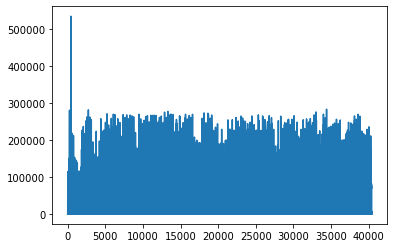

In [120]:
consumo_sne['Base'].iloc[:,1:]['GENERACIÓN [MWh]'].plot()

In [125]:
xls = pd.ExcelFile(total_files[3][1])
consumo_sne_resumen = {}
consumo_sne_resumen['Resumen'] = xls.parse('Resumen',header=5)
xls.close()

In [126]:
consumo_sne_resumen['Resumen'].columns

Index([         'Unnamed: 0',         'PROPIETARIO',             'CENTRAL',
                'SUBSISTEMA', 'TIPO DE COMBUSTIBLE',  'UNIDAD COMBUSTIBLE',
                        2008,                  2009,                  2010,
                        2011,                  2012,                  2013,
                        2014,                  2015,                  2016,
                        2017,                  2018,                  2019,
                        2020,                  2021,                  2022,
                     'Total'],
      dtype='object')

In [127]:
consumo_sne_resumen['Resumen'].iloc[:,1:]

,PROPIETARIO,CENTRAL,SUBSISTEMA,TIPO DE COMBUSTIBLE,UNIDAD COMBUSTIBLE,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,AASA Energía,El Campesino,SIC,Biogas,m3,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,96703.006950,233060.575307,0.000000,3.297636e+05
1,Aes Andes,Campiche,SIC,Carbón,Ton,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84899.220000,8.489922e+04
2,NaN,Laguna Verde TG,SIC,Petróleo Diesel,Ton,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,NaN,Laguna Verde TV,SIC,Petróleo Diesel,Ton,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,NaN,Laja,SIC,Biomasa,Ton,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21822.640000,2.182264e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,NaN,SIC,GNL,Mmbtu,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,228416.354611,77246.410966,58451.436842,0.000000,0.000000,0.000000,0.000000,0.000000,3.641142e+05
477,NaN,NaN,SIC,Petróleo Diesel,Ton,1317.831394,1494.337876,267.709712,1651.50512,579.403120,...,1460.7696,761.431402,135.672616,1978.278381,1796.935467,13133.442690,955.218804,16201.379271,555.080295,5.597446e+04
478,Tomaval Generación,Tomaval 1,SIC,Gas Natural,m3,0.000000,0.000000,0.000000,700.34400,914.057503,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.614402e+03
479,NaN,NaN,SIC,GNL,dam3,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,219.542900,19.702400,0.000000,0.000000,0.000000,0.000000,0.000000,2.392453e+02


In [ ]:

def load_excel(x,total_files,col_targets):
    dataframes = {}
    xls = pd.ExcelFile(total_files[x][1])
    sheets = xls.sheet_names

    xls.close()
    return dataframes[col_targets[0]].iloc[:,1:]

In [ ]:
col_targets = ['BALANCE','Balance','Balance de energía','Balance de Energía']
result = []
for i in range(len(col_targets)):
    result.append(load_excel(i,total_files[3][1],col_targets))